In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
image_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Training",
    validation_split=0.2,
    subset="training",
    shuffle = True,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Training",
    validation_split=0.2,
    subset="validation",
    shuffle = True,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Testing",
    image_size=image_size,
    batch_size=batch_size,
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [3]:
rescale = tf.keras.Sequential([
  layers.Rescaling(1./255)
])

train_ds = train_ds.map(
    lambda x, y: (rescale(x, training=True), y))
val_ds = val_ds.map(
    lambda x, y: (rescale(x, training=True), y))
test_ds = test_ds.map(
    lambda x, y: (rescale(x, training=True), y))

In [4]:
model = keras.models.Sequential([keras.layers.Input(shape=(128,128,3)),
                                 keras.layers.Conv2D(filters=5, kernel_size=7, activation="relu"),
                                 keras.layers.MaxPooling2D(pool_size=(5,5), strides=5),
                                 keras.layers.Conv2D(filters=3, kernel_size=3, activation="relu"),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(15, activation="relu"),
                                 keras.layers.Dense(4, activation="softmax")
                                 ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 122, 122, 5)       740       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 5)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 3)         138       
                                                                 
 flatten (Flatten)           (None, 1452)              0         
                                                                 
 dense (Dense)               (None, 15)                21795     
                                                                 
 dense_1 (Dense)             (None, 4)                 64        
                                                      

In [5]:
model.compile(optimizer=keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)

In [7]:
model_history = model.fit(x=train_ds, validation_data=val_ds, epochs=50, callbacks=early_stopping)

Epoch 1/50
143/143 [==============================] - 30s 201ms/step - loss: 0.8141 - accuracy: 0.6619 - val_loss: 0.6875 - val_accuracy: 0.6935
Epoch 2/50
143/143 [==============================] - 28s 194ms/step - loss: 0.5134 - accuracy: 0.8039 - val_loss: 0.5207 - val_accuracy: 0.7855
Epoch 3/50
143/143 [==============================] - 29s 198ms/step - loss: 0.4361 - accuracy: 0.8389 - val_loss: 0.4581 - val_accuracy: 0.8179
Epoch 4/50
143/143 [==============================] - 29s 200ms/step - loss: 0.3859 - accuracy: 0.8580 - val_loss: 0.4130 - val_accuracy: 0.8310
Epoch 5/50
143/143 [==============================] - 28s 194ms/step - loss: 0.3285 - accuracy: 0.8783 - val_loss: 0.4064 - val_accuracy: 0.8240
Epoch 6/50
143/143 [==============================] - 28s 196ms/step - loss: 0.3228 - accuracy: 0.8757 - val_loss: 0.3637 - val_accuracy: 0.8616
Epoch 7/50
143/143 [==============================] - 28s 193ms/step - loss: 0.2744 - accuracy: 0.8958 - val_loss: 0.4654 - val_ac

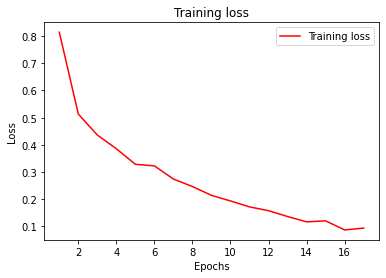

In [8]:
history_dict = model_history.history
loss_values = history_dict['loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

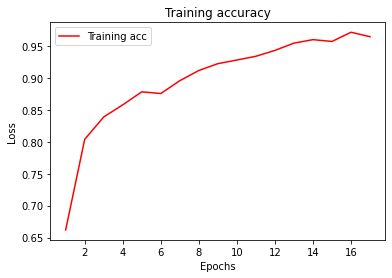

In [9]:
plt.clf()
acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
result = model.evaluate(test_ds) # Devuelve pérdida y accuracy
result

41/41 [==============================] - 3s 65ms/step - loss: 0.3580 - accuracy: 0.8871


[0.35797175765037537, 0.887109100818634]

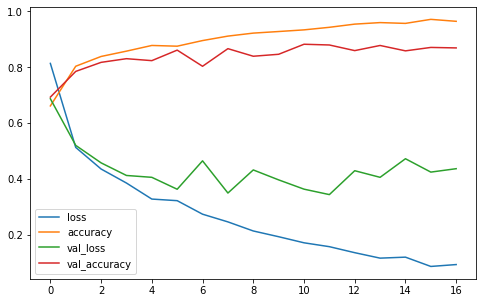

In [11]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.show()